In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import (
    model_selection,
    preprocessing,
)
b = load_boston()
bos_X = pd.DataFrame(
    b.data, columns=b.feature_names
)
bos_y = b.target
bos_X_train, bos_X_test, bos_y_train, bos_y_test = model_selection.train_test_split(
    bos_X,
    bos_y,
    test_size=0.3,
    random_state=42,
)
bos_sX = preprocessing.StandardScaler().fit_transform(
    bos_X
)
bos_sX_train, bos_sX_test, bos_sy_train, bos_sy_test = model_selection.train_test_split(
    bos_sX,
    bos_y,
    test_size=0.3,
    random_state=42,
)

In [6]:
import xgboost as xgb
xgr = xgb.XGBRegressor(
    random_state=42, base_score=0.5
)
xgr.fit(bos_X_train, bos_y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=True, subsample=1)

In [7]:
sample_idx = 5
xgr.predict(bos_X.iloc[[sample_idx]])

array([27.269186], dtype=float32)

In [8]:
import shap
shap.initjs()
exp = shap.TreeExplainer(xgr)
vals = exp.shap_values(bos_X)

/Users/matt/.env/364/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [9]:
shap.force_plot(
    exp.expected_value,
    vals[sample_idx],
    bos_X.iloc[sample_idx],
)

In [10]:
shap.force_plot(
    exp.expected_value, vals, bos_X
)

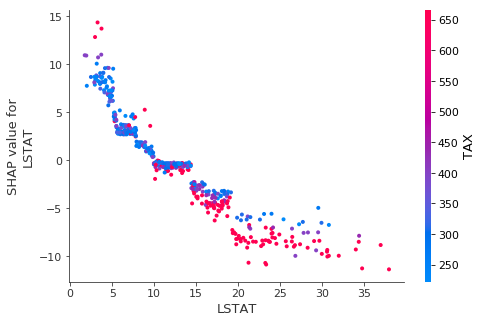

In [11]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot("LSTAT", vals, bos_X)
# fig.savefig(
#     "images/mlpr_1603.png",
#     bbox_inches="tight",
#     dpi=300,
# )

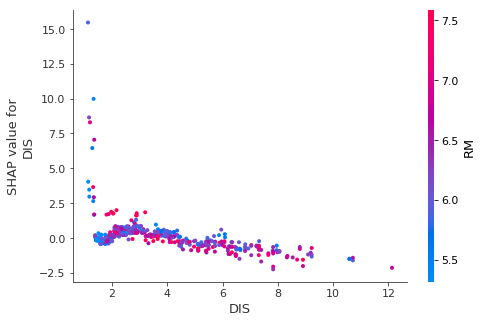

In [12]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.dependence_plot(
    "DIS", vals, bos_X, interaction_index="RM"
)
# fig.savefig(
#     "images/mlpr_1604.png",
#     bbox_inches="tight",
#     dpi=300,
# )

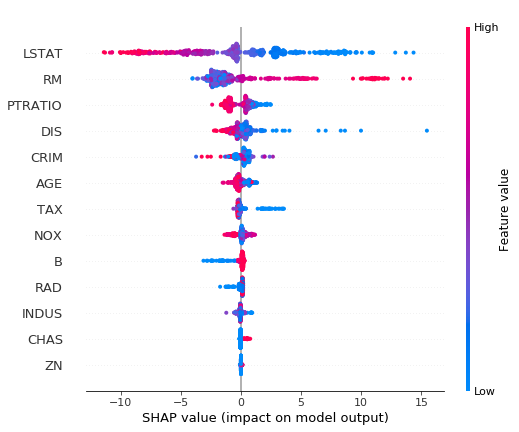

In [13]:
fig, ax = plt.subplots(figsize=(6, 4))
shap.summary_plot(vals, bos_X)
# fig.savefig(
#     "images/mlpr_1605.png",
#     bbox_inches="tight",
#     dpi=300,
# )